# Windowing

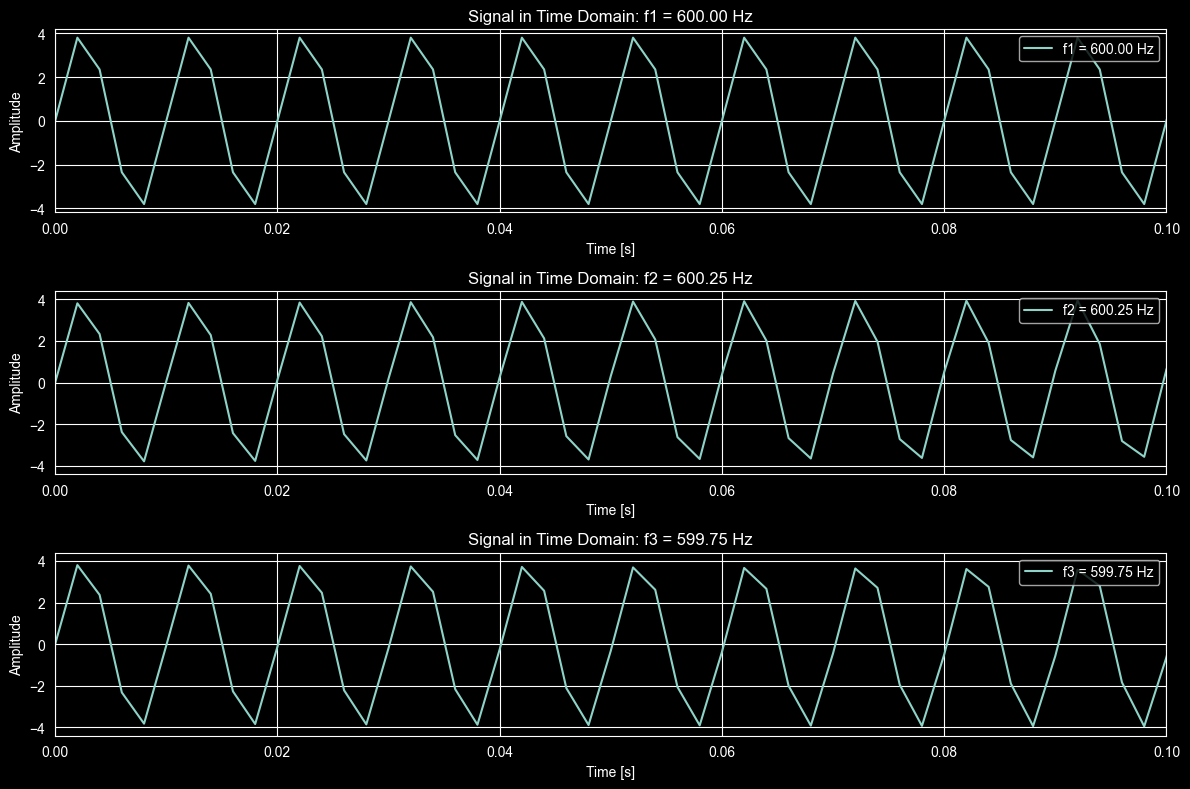

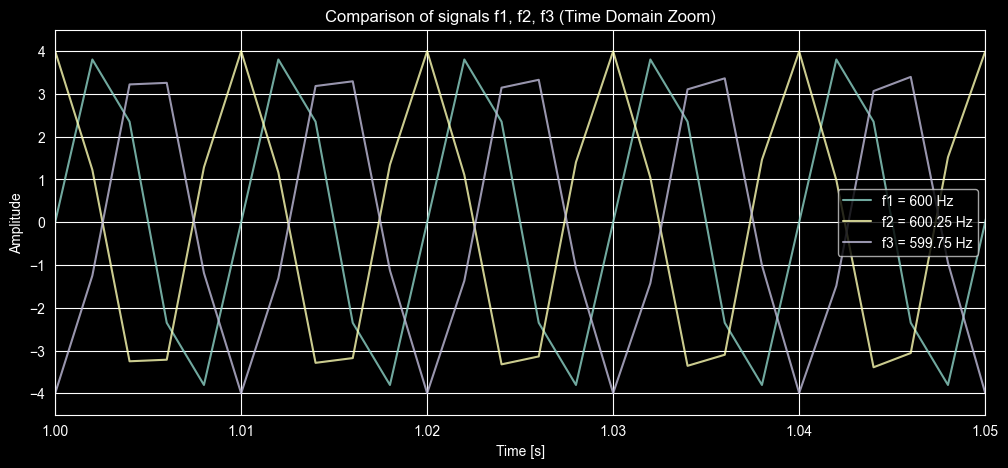

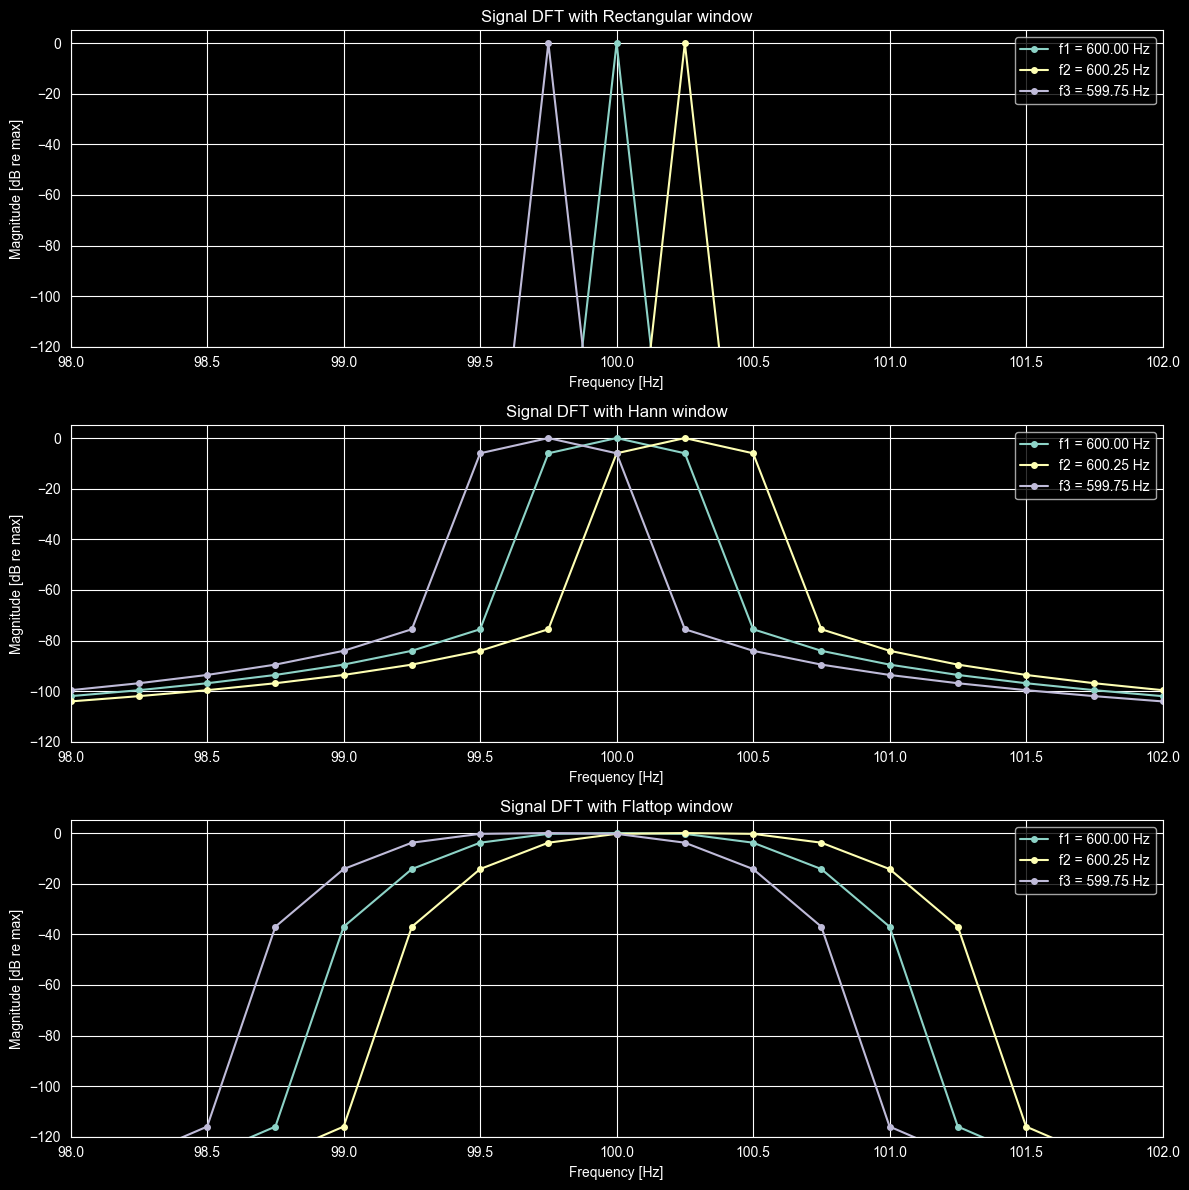

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

# ==========================
# PARAMETERS (ADAPT TO YOUR VARIANT)
# ==========================
fs = 500.0      # sampling frequency [Hz]
N  = 2000        # number of samples

# Example frequencies (replace with your own variant):
f1 = 600            # exactly bin-centered
f2 = 600.25      # slightly off-bin
f3 = 599.75       # another frequency a bit away
# f1 = 600            # exactly bin-centered
# f2 = 600.125      # slightly off-bin
# f3 = 599.875       # another frequency a bit away

A = 4.0          # amplitude -> |x[k]|_max = A for each sinusoid
n_fft = 8000     # FFT size for smooth spectra

# ==========================
# SIGNAL GENERATION (SEPARATE)
# ==========================
k = np.arange(N)

x1 = A * np.sin(2 * np.pi * f1 * k / fs)
x2 = A * np.sin(2 * np.pi * f2 * k / fs)
x3 = A * np.sin(2 * np.pi * f3 * k / fs)

signals = {
    f"f1 = {f1:.2f} Hz": x1,
    f"f2 = {f2:.2f} Hz": x2,
    f"f3 = {f3:.2f} Hz": x3,
}
# sine signals
plt.figure(figsize=(12, 8))
for i, (sname, x) in enumerate(signals.items(), start=1):
    plt.subplot(3, 1, i)
    plt.plot(k / fs, x, label=sname)
    plt.xlim(0, 0.1)
    plt.title(f"Signal in Time Domain: {sname}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# sine signals
plt.figure(figsize=(12, 5))
plt.plot(k / fs, x1, label=f"f1 = {f1} Hz", alpha=0.8)
plt.plot(k / fs, x2, label=f"f2 = {f2} Hz", alpha=0.8)
plt.plot(k / fs, x3, label=f"f3 = {f3} Hz", alpha=0.8)
plt.xlim(1.0, 1.05)
plt.ylim(-4.5, 4.5)
plt.title("Comparison of signals f1, f2, f3 (Time Domain Zoom)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# CUSTOM FLATTOP WINDOW (pure NumPy, no SciPy)
# ==========================
def flattop_window(N: int) -> np.ndarray:
    """
    Standard 5-term flat-top window (Harris coefficients).
    Good for amplitude-accurate FFT measurement.
    """
    n = np.arange(N)
    a0 = 1.0
    a1 = 1.93
    a2 = 1.29
    a3 = 0.388
    a4 = 0.028
    w = (
        a0
        - a1 * np.cos(2 * np.pi * n / (N - 1))
        + a2 * np.cos(4 * np.pi * n / (N - 1))
        - a3 * np.cos(6 * np.pi * n / (N - 1))
        + a4 * np.cos(8 * np.pi * n / (N - 1))
    )
    return w

# ==========================
# WINDOWS
# ==========================
windows = {
    "Rectangular": np.ones(N),
    "Hann":        np.hanning(N),
    "Flattop":     flattop_window(N),
}

# Frequency axis for DFT (0 .. fs/2)
freq = np.linspace(0, fs, n_fft, endpoint=False)
half = n_fft // 2
freq_half = freq[:half]

# ==========================
# HELPER: MAGNITUDE TO dB
# ==========================
def mag2db(x, min_db=-120):
    mag = np.abs(x)
    mag = np.maximum(mag, 1e-12)  # avoid log(0)
    db = 20 * np.log10(mag)
    db = np.maximum(db, min_db)
    return db

# ==========================
# 1. NORMALIZED DFT SPECTRA OF EACH SIGNAL
#    (each signal treated separately)
# ==========================
plt.figure(figsize=(12, 12))

for i, (wname, w) in enumerate(windows.items(), start=1):
    plt.subplot(3, 1, i)

    for j, (sname, x) in enumerate(signals.items()):
        xw = x * w
        # Liczymy zwykłe FFT bez n_fft, żeby zobaczyć kropki
        X = np.fft.fft(xw)

        # --- KLUCZOWA ZMIANA: Normalizacja do własnego szczytu ---
        # To sprawi, że każdy sygnał będzie miał czubek na 0 dB
        X_mag = np.abs(X)
        X_norm = X_mag / np.max(X_mag)
        X_db = 20 * np.log10(X_norm + 1e-12)

        f_axis = np.fft.fftfreq(N, 1/fs)

        # Rysujemy 'o-' aby widzieć kropki i linię
        plt.plot(np.fft.fftshift(f_axis), np.fft.fftshift(X_db), 'o-', ms=4, label=sname)

    plt.title(f"Signal DFT with {wname} window")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude [dB re max]")
    plt.xlim([98, 102])
    plt.ylim([-120, 5])
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# ==========================
# 2. WINDOW DTFT SPECTRA (NORMALIZED TO MAINLOBE MAX)
# ==========================
# plt.figure(figsize=(12, 12))
#
# for i, (wname, w) in enumerate(windows.items(), start=1):
#     W = np.fft.fft(w, n=n_fft)
#     W = np.fft.fftshift(W)  # center zero frequency
#     W_norm = W / np.max(np.abs(W))  # normalize to mainlobe max
#     W_db = mag2db(W_norm)
#
#     # Normalized frequency axis in rad/sample (−π..π)
#     omega = np.linspace(-np.pi, np.pi, n_fft, endpoint=False)
#
#     plt.subplot(3, 1, i)
#     plt.plot(omega, W_db)
#     plt.title(f"DTFT magnitude of {wname} window")
#     plt.xlabel("Normalized frequency Ω [rad/sample]")
#     plt.ylabel("Magnitude [dB re mainlobe max]")
#     # plt.xlim([-0.25, 0.25])
#     # plt.ylim([-120, 5])
#     plt.grid(True)
#
# plt.tight_layout()
# plt.show()


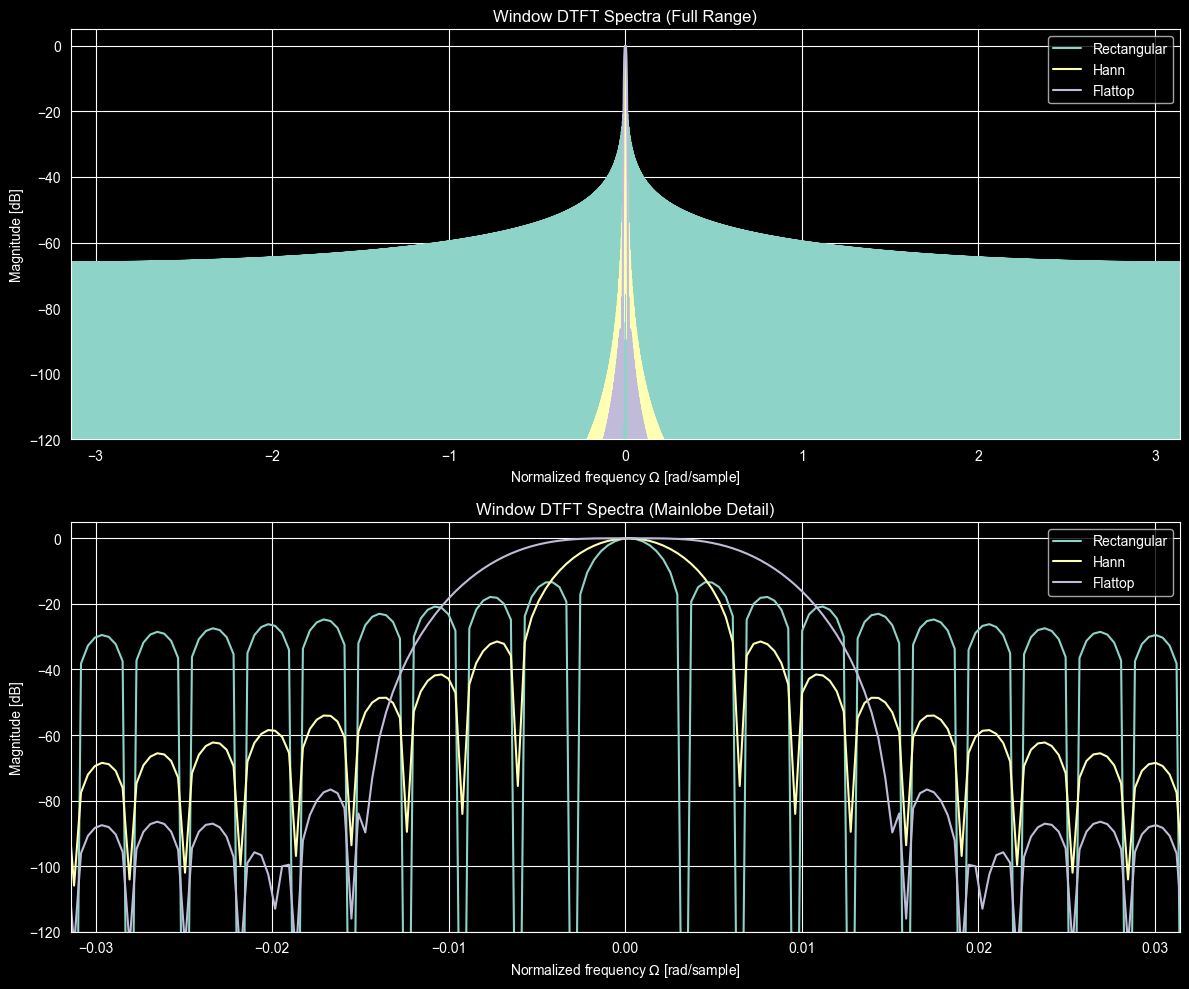

In [142]:
n_fft = 16000  # for smoothness
omega = np.linspace(-np.pi, np.pi, n_fft)

# DTFT for windows
def get_window_dtft(w, n):
    W = np.fft.fft(w, n=n)
    W = np.fft.fftshift(W)
    mag = np.abs(W)
    mag /= np.max(mag)
    return 20 * np.log10(mag + 1e-12)

wrect = np.ones(N)
whann = np.hanning(N)
wflattop = flattop_window(N)

windows_dtft = {
    "Rectangular": get_window_dtft(wrect, n_fft),
    "Hann":        get_window_dtft(whann, n_fft),
    "Flattop":     get_window_dtft(wflattop, n_fft)
}

# --- PLOT 1: Full range -pi to pi ---
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
for name, db in windows_dtft.items():
    plt.plot(omega, db, label=name)

plt.title("Window DTFT Spectra (Full Range)")
plt.xlabel(r"Normalized frequency $\Omega$ [rad/sample]")
plt.ylabel("Magnitude [dB]")
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 5)
plt.grid(True)
plt.legend()

# --- PLOT 2: Mainlobe (-pi/100 do pi/100) ---
plt.subplot(2, 1, 2)
for name, db in windows_dtft.items():
    plt.plot(omega, db, label=name)

plt.title("Window DTFT Spectra (Mainlobe Detail)")
plt.xlabel(r"Normalized frequency $\Omega$ [rad/sample]")
plt.ylabel("Magnitude [dB]")
plt.xlim(-np.pi/100, np.pi/100)
plt.ylim(-120, 5)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

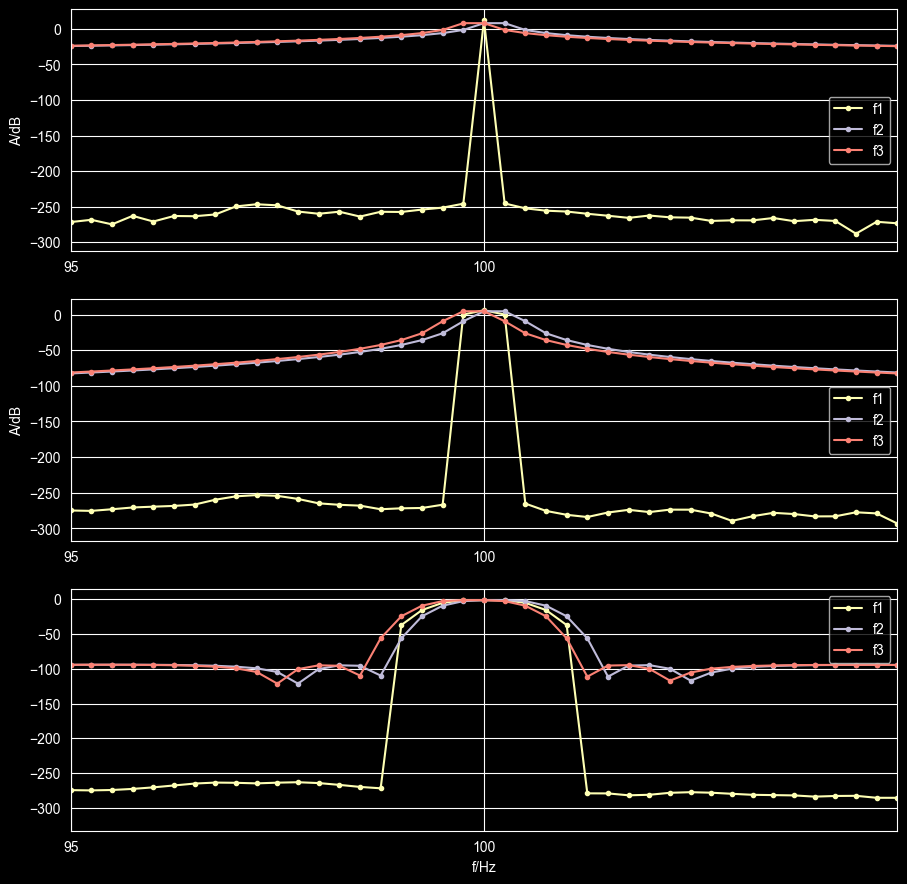

In [150]:
import numpy as np
import matplotlib . pyplot as plt
from numpy. fft import fft , ifft , fftshift
from scipy . signal .windows import hann, flattop

# ==========================
# PARAMETERS (ADAPT TO YOUR VARIANT)
# ==========================
fs = 500.0      # sampling frequency [Hz]
N  = 2000        # number of samples

# Example frequencies (replace with your own variant):
# f1 = 600            # exactly bin-centered
# f2 = 600.25      # slightly off-bin
# f3 = 599.75       # another frequency a bit away

f1 = 600            # exactly bin-centered
f2 = 600.125      # slightly off-bin
f3 = 599.875       # another frequency a bit away

A = 4.0          # amplitude -> |x[k]|_max = A for each sinusoid
n_fft = 8000     # FFT size for smooth spectra

# ==========================
# SIGNAL GENERATION (SEPARATE)
# ==========================
k = np.arange(N)

x1 = A * np.sin(2 * np.pi * f1 * k / fs)
x2 = A * np.sin(2 * np.pi * f2 * k / fs)
x3 = A * np.sin(2 * np.pi * f3 * k / fs)


wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)
# plt . plot(wrect ,'C1o-', ms=3, label='rect')
# plt . plot(whann, 'C2o-', ms=3, label='hann')
# plt . plot(wflattop , 'C3o-', ms=3, label='flattop')
# plt . xlabel (r'$k$')
# plt . ylabel (r'window $w[k]$ ')
# plt . xlim(0 , N)
# plt . legend ()
# plt . grid(True)

X1wrect = fft (x1)
X2wrect = fft (x2)
X3wrect = fft (x3)
X1whann = fft (x1*whann)
X2whann = fft (x2*whann)
X3whann = fft (x3*whann)
X1wflattop = fft (x1*wflattop)
X2wflattop = fft (x2*wflattop)
X3wflattop = fft (x3*wflattop)

def fft2db(X):
    N = X. size
    Xtmp = 2/N*X
    Xtmp[0] *= 1/2
    if N % 2 == 0:
        Xtmp[N//2] = Xtmp[N//2] / 2
    return 20*np. log10(np.abs (Xtmp))

df = fs/N
f = np.arange(N)*df

plt . figure ( figsize =(16/1.5, 16/1.5))
plt . subplot(3 , 1, 1)
plt . plot(f , fft2db(X1wrect) , 'C1o-', ms=3, label='f1')
plt . plot(f , fft2db(X2wrect) , 'C2o-', ms=3, label='f2')
plt . plot(f , fft2db(X3wrect) , 'C3o-', ms=3, label='f3')
plt . xlim(95, 105)
# plt . ylim(-120, 60)
plt . xticks (np. arange(95, 105, 5))
# plt . yticks (np. arange(-120, 60, 20))
plt . legend ()
plt . ylabel ( 'A/dB')
plt . grid(True)

plt . subplot(3 , 1, 2)
plt . plot(f , fft2db(X1whann) , 'C1o-', ms=3, label='f1')
plt . plot(f , fft2db(X2whann) , 'C2o-', ms=3, label='f2')
plt . plot(f , fft2db(X3whann) , 'C3o-', ms=3, label='f3')
plt . xlim(95, 105)
# plt . ylim(-120, 0)
plt . xticks (np. arange(95, 105, 5))
# plt . yticks (np. arange(-120, 60, 20))
plt . legend ()
plt . ylabel ( 'A/dB')
plt . grid(True)

plt . subplot(3 , 1, 3)
plt . plot(f , fft2db(X1wflattop) , 'C1o-', ms=3, label='f1')
plt . plot(f , fft2db(X2wflattop) , 'C2o-', ms=3, label='f2')
plt . plot(f , fft2db(X3wflattop) , 'C3o-', ms=3, label='f3')
plt . xlim(95, 105)
# plt . ylim(-120, 0)
plt . xticks (np. arange(95, 105, 5))
# plt . yticks (np. arange(-120, 60, 20))
plt . legend ()
plt . xlabel ( 'f/Hz')
plt . grid(True)
plt.show()

# def winDTFTdB(w):
#     N = w. size
#     Nz = 100*N
#     W = np. zeros(Nz)
#     W[0:N] = w
#     W = np.abs(fftshift(fft (W)))
#     W /= np.max(W)
#     W = 20 * np.log10(W + 1e-12)
#     Omega = 2*np.pi/Nz*np.arange(Nz)-np.pi
#     return Omega, W
#
# plt . plot([-np. pi , +np. pi ] , [-3.01,-3.01], 'gray')
# plt . plot([-np. pi , +np. pi ] , [-13.3,-13.3], 'gray')
# plt . plot([-np. pi , +np. pi ] , [-31.5,-31.5], 'gray')
# plt . plot([-np. pi , +np. pi ] , [-93.6,-93.6], 'gray')
#
# Omega, W = winDTFTdB(wrect)
# plt . plot(Omega, W, label='rect')
# Omega, W = winDTFTdB(whann)
# plt . plot(Omega, W, label='hann')
# Omega, W = winDTFTdB(wflattop)
# plt . plot(Omega, W, label='flattop')
# plt . xlim(-np. pi , np. pi)
# plt . ylim(-120, 10)
# plt . xlim(-np. pi/100, np. pi/100)
# plt . xlabel (r'$\Omega$')
# plt . ylabel (r'|W($\Omega$)|/dB')
# plt . legend ()
# plt . grid(True)
# plt . ylabel ( 'A/dB')
# plt . grid(True)